In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

delays = {}

exec(open('utils.py').read())
print('Loaded')

MAX_YEAR = CURRENT_YEAR + 100 # CURRENT_YEAR defined in utils.py
years = list(range(CURRENT_YEAR, MAX_YEAR))

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.109    | 3.044     | 7.478     | 0.01537   |
| 9         | -0.1047   | 1.527     | 9.876     | 3.729     |
| 11        | -0.1007   | 0.5087    | 1.599     | 6.568     |
| 13        | -0.09492  | 0.8825    | 9.417     | 8.693     |
| 28        | -0.06533  | 1.191     | 6.428     | 0.1441    |
| 42        | -0.05127  | 1.55      | 6.321     | 0.167     |
| 43        | -0.04461  | 1.519     | 5.587     | 0.3245    |
| 58        | -0.03931  | 1.519     | 6.7       | 0.2154    |
| 67        | -0.03229  | 1.379     | 6.995     | 0.3511    |
| 73        | -0.02935  | 1.568     | 7.255     | 0.291     |
| 75        | -0.02388  | 1.161     | 7.608     | 0.283     |
| 91        | -0.01925  | 1.178     | 8.696     | 0.393     |
| 104       | -0.01757  | 0.8415    | 8.715     | 0.3848    |
| 105       | -0.01329  | 0.8728    | 8.962     | 0.4344    |
Curve pa

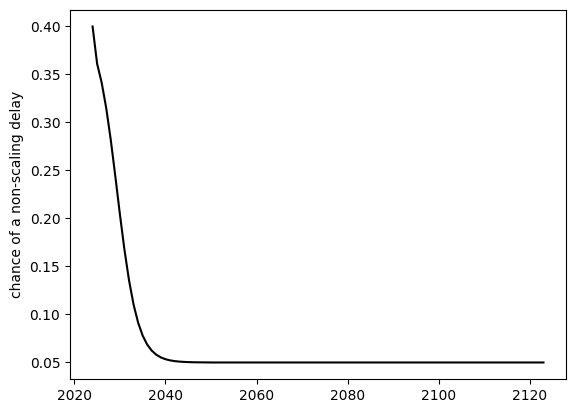

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 36%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 34%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2034

In [2]:
nonscaling_points = [(2024, 0.4),
                     (2027, 0.3),
                     (2030, 0.2),
                     (2035, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

In [ ]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.6),
                     (2026, 0.4),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.1885   | 1.819     | 2.955     | 2.674     |
| 8         | -0.1885   | 0.6065    | 0.5984    | 6.056     |
| 9         | -0.1497   | 1.347     | 9.099     | 6.752     |
| 12        | -0.1153   | 2.955     | 9.233     | 0.4871    |
| 17        | -0.04822  | 0.1765    | 4.353     | 0.7168    |
| 44        | -0.04609  | 0.2885    | 4.77      | 1.207     |
| 54        | -0.03937  | 0.6097    | 4.636     | 0.6181    |
| 59        | -0.03783  | 0.9202    | 5.312     | 0.5808    |


## Data delay

In [ ]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

In [ ]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

In [ ]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

In [ ]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

In [ ]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [ ]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

In [ ]:
print('File last ran: {}'.format(dt.now()))